# STATISTICAL AND MACHINE LEARNING APPROCHES FOR MARKETING

# Assignment 2 by Swasthik Vellingiri Kowsalya

**Question: 6**

(a) Estimate the probability that a student who studies for 40 hr and has an undergrad GPA of 3.5 gets an A in the class.

p(X) =  (e−6 + 0.05 * X1 + X2)/(1 + e−6 + 0.05 * X1 + X2)

p(X) =  (e−6 + 0.05 * 40 + 3.5)/(1 + e−6 + 0.05 * 40 + 3.5) = 0.37 

(b) e−6 + 0.05 * X1 + 3.5 (1 + e−6 + 0.05 * X1 + 3.5) = 0.50

X1 = 50

**Question: 8**

For K=1, KNN model, the training error rate is 0%. Hence the average error mentioned in the question 18% means the error rate of the test set is 36%. So logistic regression is better as it has lesser test error rate. 

**Question: 9**

p(X)/(1−p(X))=0.37
 
p(X)=0.37/(1+0.37)= 0.37/1.37 = 0.2700

**Question: 10** - A

In [3]:
install.packages("ISLR")


  There is a binary version available but the source version is later:
     binary source needs_compilation
ISLR    1.2    1.4             FALSE



installing the source package 'ISLR'



In [4]:
library(ISLR)
summary(Weekly)

      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

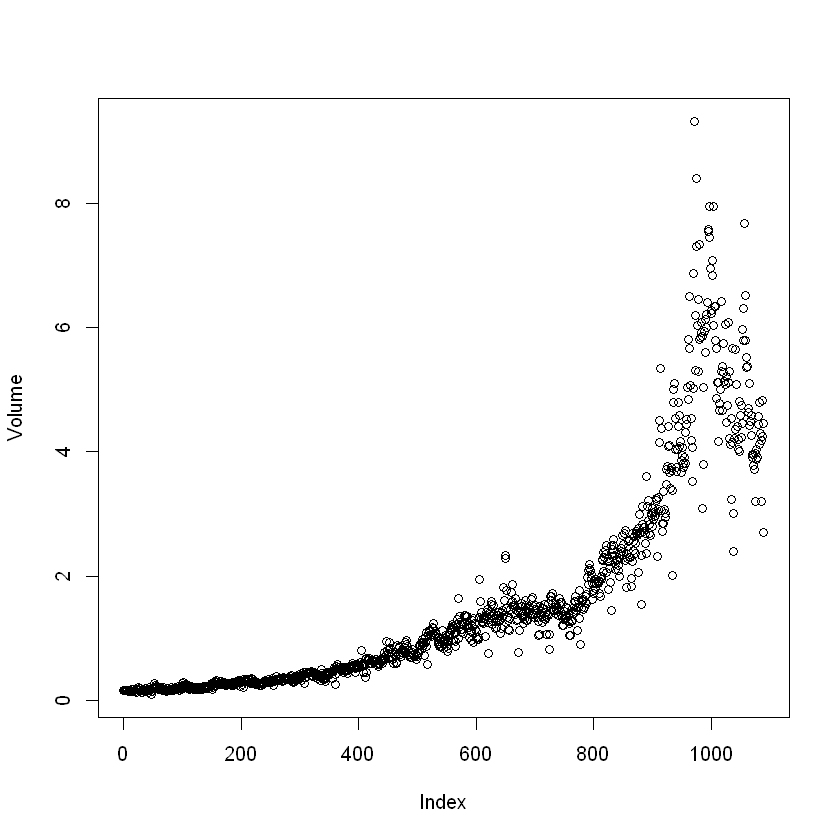

In [5]:
attach(Weekly)
plot(Volume)

**10 - B**

In [6]:
glm_model <- glm(Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume, data = Weekly, family = binomial)
summary(glm_model)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Weekly)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


**10 - C**

In [8]:
threshold <- 0.5
probs <- predict(glm_model, type = "response")
glm_pred <- rep("Down", length(probs))
glm_pred[probs > threshold] <- "Up"
table(glm_pred, Direction)

        Direction
glm_pred Down  Up
    Down   54  48
    Up    430 557

**10 - D**

In [12]:
Weekly_ <- Weekly[!(Year < 2009), ]

glm_model2 <- glm(Direction ~ Lag2, data = Weekly_, family = binomial, subset = train)
summary(glm_model2)


Call:
glm(formula = Direction ~ Lag2, family = binomial, data = Weekly_, 
    subset = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5767  -1.3052   0.9242   1.0419   1.2978  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  0.32377    0.20136   1.608    0.108
Lag2         0.08562    0.06707   1.277    0.202

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 141.04  on 103  degrees of freedom
Residual deviance: 139.37  on 102  degrees of freedom
  (881 observations deleted due to missingness)
AIC: 143.37

Number of Fisher Scoring iterations: 4


In [13]:
probs2 <- predict(glm_model2, Weekly, type = "response")
glm_model2 <- rep("Down", length(probs2))
glm_model2[probs2 > 0.5] <- "Up"
table(glm_model2, Direction)

          Direction
glm_model2 Down  Up
      Down   26  24
      Up    458 581

**10 - E**

In [17]:
#LDA

library(MASS)
model_lda <- lda(Direction ~ Lag2, data = Weekly_, subset = train)

predi_lda <- predict(model_lda, Weekly)
table(predi_lda$class, Direction)

      Direction
       Down  Up
  Down   25  23
  Up    459 582

**10 - F**

In [19]:
#QDA

model_qda <- qda(Direction ~ Lag2, data = Weekly_, subset = train)
pred_qda <- predict(model_qda, Weekly)
table(pred_qda$class, Direction)


      Direction
       Down  Up
  Down   30  24
  Up    454 581

**10 - G**

In [25]:
knn_train <- Lag2[(Year < 2009)]
knn_test <- Lag2[!(Year < 2009)]
knn_direction <- Direction[(Year < 2009)]
knn_prediction <- knn(knn_train, knn_test, knn_direction, k = 1)
table(knn_prediction, knn_direction)

ERROR: Error in knn(knn_train, knn_test, knn_direction, k = 1): dims of 'test' and 'train' differ
